In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("C:/Users/user/Desktop/Thesis/cleaned_df.csv", low_memory=False)

In [5]:
# pearson correlation for numerical variables 
# List of numerical features
numerical_features = [
    'loan_amnt', 'int_rate', 'emp_length', 'dti', 'delinq_2yrs', 'open_acc', 'pub_rec',
    'revol_util', 'tax_liens', 'mort_acc', 'fico_score_change', 'sub_grade_num',
    'years_of_credit_history'
]

# Compute the correlation matrix for numerical features only
num_correlation_matrix = data[numerical_features].corr()

# Display the numerical correlation matrix
num_correlation_matrix


,loan_amnt,int_rate,emp_length,dti,delinq_2yrs,open_acc,pub_rec,revol_util,tax_liens,mort_acc,fico_score_change,sub_grade_num,years_of_credit_history
loan_amnt,1.000000,0.141817,0.114023,0.032006,-0.002871,0.186153,-0.066023,0.108504,0.007390,0.227460,0.020057,0.146688,0.149739
int_rate,0.141817,1.000000,-0.005627,0.147027,0.048254,-0.004046,0.053132,0.243135,0.011857,-0.079857,-0.196726,0.976618,-0.116148
emp_length,0.114023,-0.005627,1.000000,-0.003313,0.025893,0.062762,0.010781,0.047568,0.007684,0.162379,0.023848,-0.007003,0.121522
dti,0.032006,0.147027,-0.003313,1.000000,-0.007734,0.224757,-0.031331,0.140775,-0.023078,-0.027883,-0.042812,0.151665,0.021410
delinq_2yrs,-0.002871,0.048254,0.025893,-0.007734,1.000000,0.053071,-0.020268,-0.011113,0.011227,0.072966,0.001804,0.054583,0.077469
open_acc,0.186153,-0.004046,0.062762,0.224757,0.053071,1.000000,-0.018688,-0.140485,-0.004469,0.121513,0.012862,-0.000212,0.128349
pub_rec,-0.066023,0.053132,0.010781,-0.031331,-0.020268,-0.018688,1.000000,-0.068818,0.698685,-0.005194,0.002145,0.061120,0.055517
revol_util,0.108504,0.243135,0.047568,0.140775,-0.011113,-0.140485,-0.068818,1.000000,-0.011418,0.026472,0.004390,0.250446,0.042648
tax_liens,0.007390,0.011857,0.007684,-0.023078,0.011227,-0.004469,0.698685,-0.011418,1.000000,-0.011488,-0.001081,0.016670,0.028662
mort_acc,0.227460,-0.079857,0.162379,-0.027883,0.072966,0.121513,-0.005194,0.026472,-0.011488,1.000000,0.094881,-0.080350,0.286497


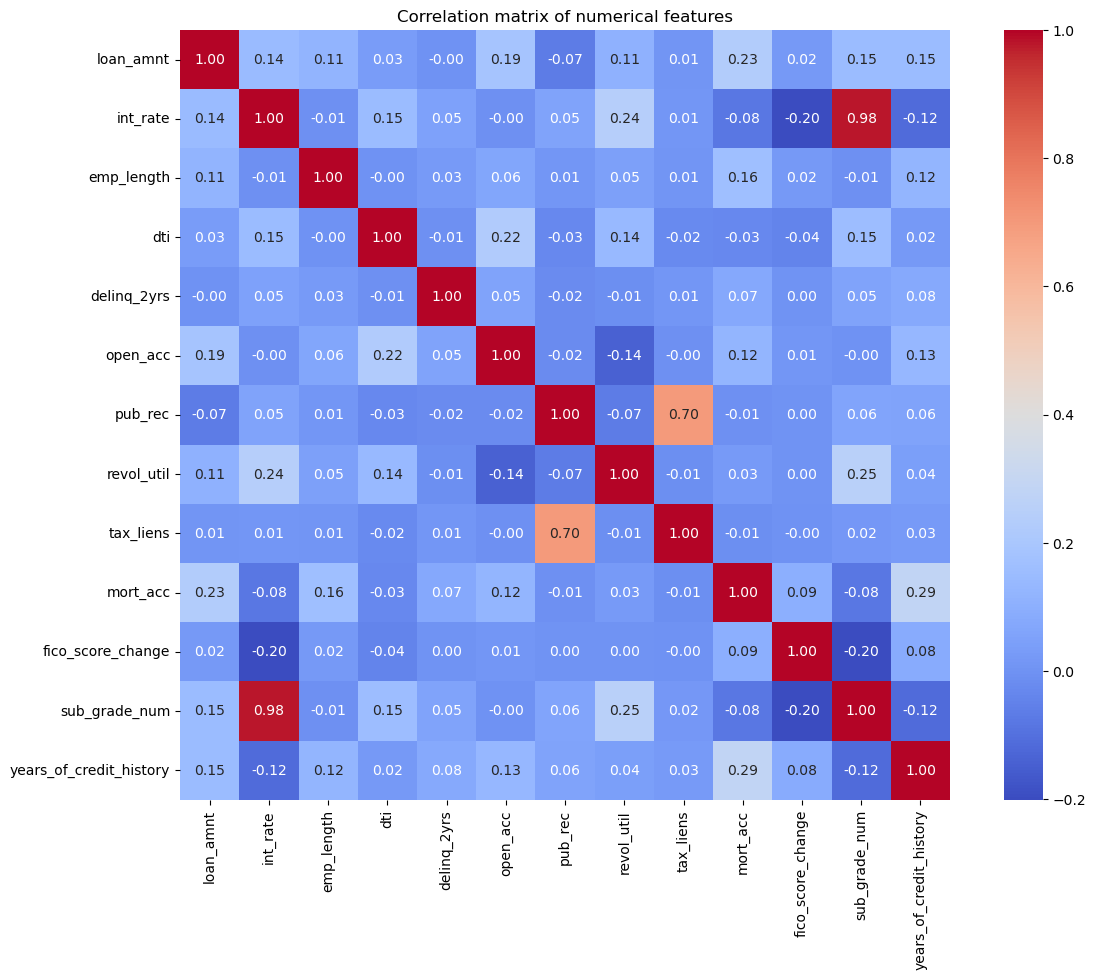

In [6]:
plt.figure(figsize=(14, 10))
sns.heatmap(num_correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation matrix of numerical features')
plt.show()

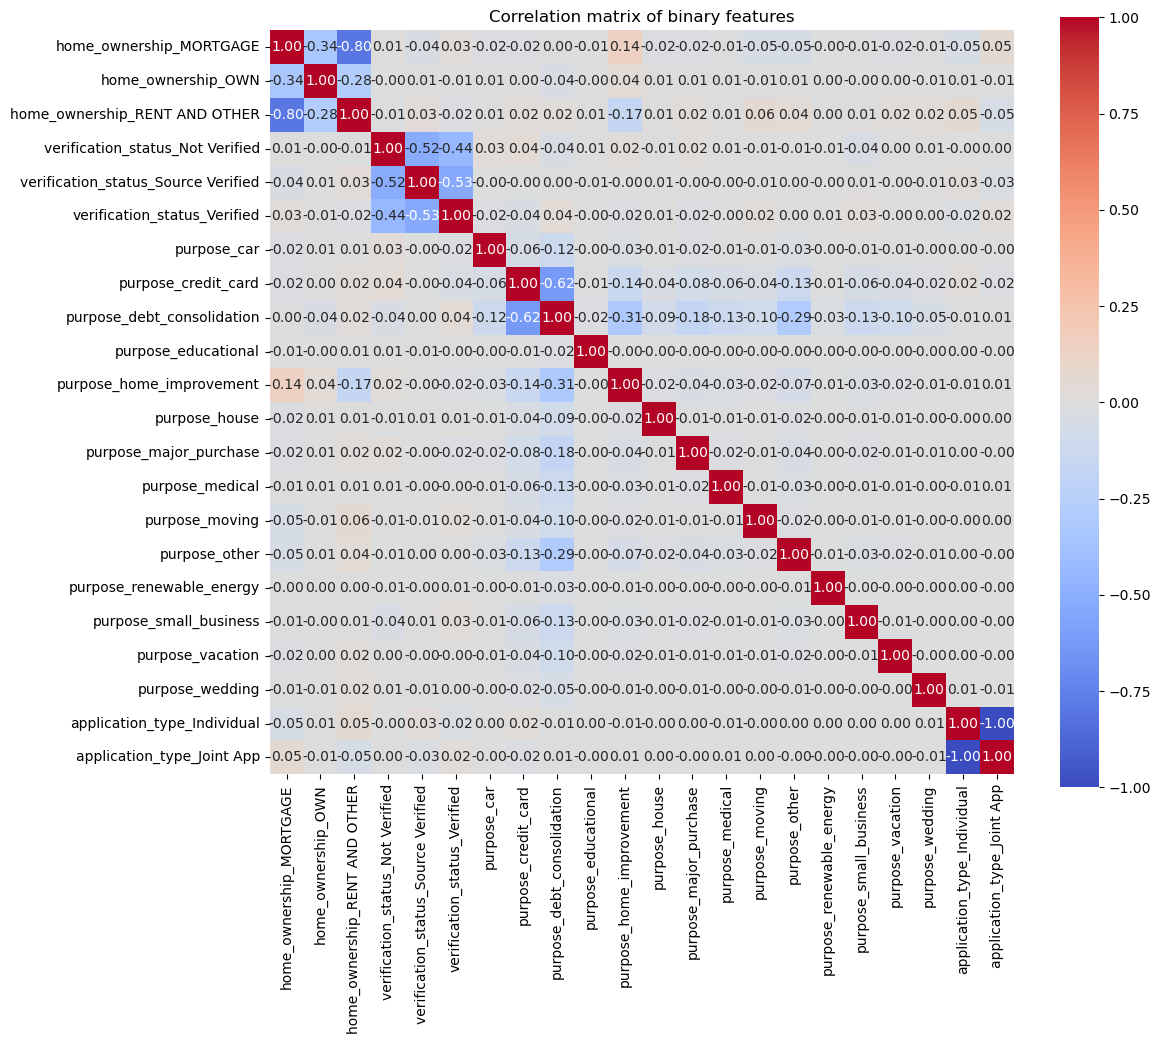

In [7]:
# investigate correlations among binary variables- Point-Biserial Correlation

binary_columns = [
    'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT AND OTHER',
    'verification_status_Not Verified', 'verification_status_Source Verified', 'verification_status_Verified',
    'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_educational',
    'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical',
    'purpose_moving', 'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
    'purpose_vacation', 'purpose_wedding', 'application_type_Individual', 'application_type_Joint App'
]

# Calculate the correlation matrix for binary features only
binary_correlation_matrix = data[binary_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(binary_correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation matrix of binary features')
plt.show()


In [8]:
# Feature Importance-Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

selected_features = [
    'loan_amnt', 'int_rate', 'emp_length', 'dti', 'delinq_2yrs', 'open_acc',
    'pub_rec', 'revol_util', 'tax_liens', 'mort_acc', 'fico_score_change',
    'sub_grade_num', 'years_of_credit_history', 'home_ownership_MORTGAGE',
    'home_ownership_OWN', 'home_ownership_RENT AND OTHER',
    'verification_status_Not Verified', 'verification_status_Source Verified',
    'verification_status_Verified', 'purpose_car', 'purpose_credit_card',
    'purpose_debt_consolidation', 'purpose_educational',
    'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
    'purpose_medical', 'purpose_moving', 'purpose_other',
    'purpose_renewable_energy', 'purpose_small_business',
    'purpose_vacation', 'purpose_wedding', 'application_type_Individual',
    'application_type_Joint App'
]

# Create the features DataFrame and target Series
X = data[selected_features]  # Features
y = data['loan_status']     # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Map the feature names to their importance scores
feature_importances = sorted(zip(X.columns, importances), key=lambda x: x[1], reverse=True)

# Print the feature importances
for feature, importance in feature_importances:
    print(f'Feature: {feature}, Importance: {importance}')


Feature: fico_score_change, Importance: 0.4985257914204424
Feature: int_rate, Importance: 0.06654988871590056
Feature: dti, Importance: 0.060615155775214216
Feature: revol_util, Importance: 0.0575879364164908
Feature: loan_amnt, Importance: 0.054095098557026364
Feature: sub_grade_num, Importance: 0.0518876144187025
Feature: years_of_credit_history, Importance: 0.04283842542306821
Feature: open_acc, Importance: 0.03997069897780437
Feature: emp_length, Importance: 0.029665381797139376
Feature: mort_acc, Importance: 0.022093939763344138
Feature: delinq_2yrs, Importance: 0.012009923557828803
Feature: pub_rec, Importance: 0.008222192222292297
Feature: purpose_debt_consolidation, Importance: 0.006331043641829677
Feature: purpose_credit_card, Importance: 0.004955590012326856
Feature: verification_status_Verified, Importance: 0.004688081557516792
Feature: verification_status_Source Verified, Importance: 0.004575663982927485
Feature: verification_status_Not Verified, Importance: 0.0045699763144

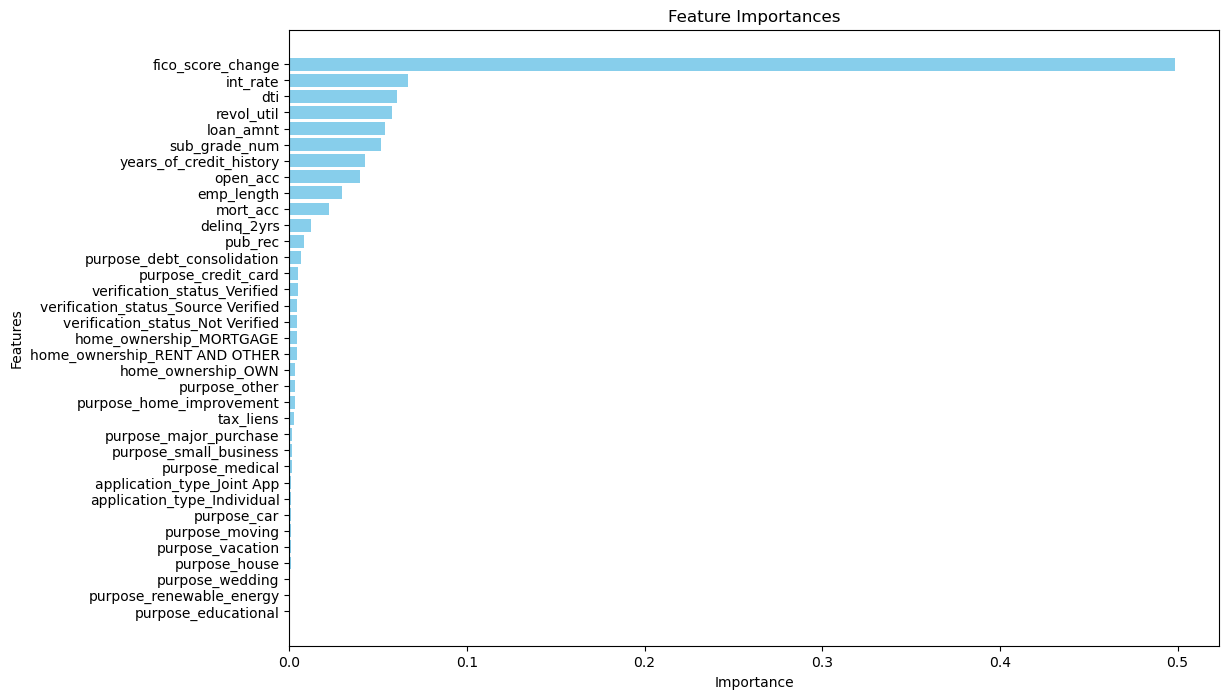

In [9]:
# Feature importances
feature_importances = [
    ('fico_score_change', 0.4985257914204424),
    ('int_rate', 0.06654988871590056),
    ('dti', 0.060615155775214216),
    ('revol_util', 0.0575879364164908),
    ('loan_amnt', 0.054095098557026364),
    ('sub_grade_num', 0.0518876144187025),
    ('years_of_credit_history', 0.04283842542306821),
    ('open_acc', 0.03997069897780437),
    ('emp_length', 0.029665381797139376),
    ('mort_acc', 0.022093939763344138),
    ('delinq_2yrs', 0.012009923557828803),
    ('pub_rec', 0.008222192222292297),
    ('purpose_debt_consolidation', 0.006331043641829677),
    ('purpose_credit_card', 0.004955590012326856),
    ('verification_status_Verified', 0.004688081557516792),
    ('verification_status_Source Verified', 0.004575663982927485),
    ('verification_status_Not Verified', 0.004569976314485534),
    ('home_ownership_MORTGAGE', 0.004278624327944316),
    ('home_ownership_RENT AND OTHER', 0.00427689315724361),
    ('home_ownership_OWN', 0.0032233578976816665),
    ('purpose_other', 0.0031333147496428056),
    ('purpose_home_improvement', 0.0029843820122863133),
    ('tax_liens', 0.002632811360578125),
    ('purpose_major_purchase', 0.001710685561323127),
    ('purpose_small_business', 0.0013283048642309073),
    ('purpose_medical', 0.001313520678066738),
    ('application_type_Joint App', 0.0010302818385353018),
    ('application_type_Individual', 0.001024624301526372),
    ('purpose_car', 0.0009761943863900205),
    ('purpose_moving', 0.0008591182710067886),
    ('purpose_vacation', 0.0007896690911433976),
    ('purpose_house', 0.0007278090681735593),
    ('purpose_wedding', 0.0002877340039053419),
    ('purpose_renewable_energy', 0.00017063732931555322),
    ('purpose_educational', 6.963454666561031e-05)
]

# Extract feature names and importances
features = [x[0] for x in feature_importances]
importance = [x[1] for x in feature_importances]

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.barh(features, importance, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import warnings

warnings.filterwarnings('ignore')

# Filter the dataset for the years 2007 to 2019
filtered_data = data[(data['issue_year'] >= 2007) & (data['issue_year'] <= 2009)]

# Define the features (without 'loan_status') and target after filtering
selected_features = [
    'loan_amnt', 'int_rate', 'emp_length', 'dti', 'delinq_2yrs', 'open_acc',
    'pub_rec', 'revol_util', 'tax_liens', 'mort_acc', 'fico_score_change',
    'sub_grade_num', 'years_of_credit_history', 'home_ownership_MORTGAGE',
    'home_ownership_OWN', 'home_ownership_RENT AND OTHER',
    'verification_status_Not Verified', 'verification_status_Source Verified',
    'verification_status_Verified', 'purpose_car', 'purpose_credit_card',
    'purpose_debt_consolidation', 'purpose_educational',
    'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase',
    'purpose_medical', 'purpose_moving', 'purpose_other',
    'purpose_renewable_energy', 'purpose_small_business',
    'purpose_vacation', 'purpose_wedding', 'application_type_Individual',
    'application_type_Joint App'
]

X_filtered = filtered_data[selected_features]
y_filtered = filtered_data['loan_status']

# Split the filtered data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.3, random_state=42
)

# Define your models
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'RandomForest': RandomForestClassifier(),
    'SVM': SVC(),
    'GradientBoosting': GradientBoostingClassifier()
}

# Evaluate initial performance with all features
initial_scores = {}
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    initial_scores[name] = scores.mean()
    print(f"{name} initial performance: {initial_scores[name]}")

# Features you consider for removal
features_to_remove = [
    'sub_grade_num', 'tax_liens', 'purpose_major_purchase',
    'purpose_small_business', 'purpose_medical', 'application_type_Joint App',
    'application_type_Individual', 'purpose_car', 'purpose_moving',
    'purpose_vacation', 'purpose_house', 'purpose_wedding','purpose_other','purpose_home_improvement',
    'purpose_renewable_energy', 'purpose_educational'
]

# Evaluate performance after feature removal
for feature in features_to_remove:
    X_train_reduced = X_train.drop(columns=[feature])
    X_test_reduced = X_test.drop(columns=[feature])
    
    for name, model in models.items():
        scores = cross_val_score(model, X_train_reduced, y_train, cv=5, scoring='accuracy')
        reduced_score = scores.mean()
        print(f"{name} performance without '{feature}': {reduced_score}")
        print(f"Change in performance: {reduced_score - initial_scores[name]}\n")


LogisticRegression initial performance: 0.8577441976754112
RandomForest initial performance: 0.8575212518141793
SVM initial performance: 0.8590679692168843
GradientBoosting initial performance: 0.8546478357908602
LogisticRegression performance without 'sub_grade_num': 0.8570807264034734
Change in performance: -0.0006634712719377767

RandomForest performance without 'sub_grade_num': 0.8586259802666081
Change in performance: 0.001104728452428816

SVM performance without 'sub_grade_num': 0.8590679692168843
Change in performance: 0.0

GradientBoosting performance without 'sub_grade_num': 0.8535433512616931
Change in performance: -0.0011044845291671157

LogisticRegression performance without 'tax_liens': 0.8577444415986731
Change in performance: 2.439232619222409e-07

RandomForest performance without 'tax_liens': 0.8575219835839645
Change in performance: 7.317697852116112e-07

SVM performance without 'tax_liens': 0.8590679692168843
Change in performance: 0.0

GradientBoosting performance wi

In [4]:
# drop columns that have no significant impact 
columns_to_remove = [
    'tax_liens',
    'purpose_vacation',
    'purpose_home_improvement',
    'purpose_renewable_energy',
    'purpose_educational',
    'purpose_moving',
    'purpose_other',
    'purpose_small_business',
    'purpose_house',
    'purpose_wedding'
]

# Remove the columns from the DataFrame
cleaned_df_exploration = data.drop(columns=columns_to_remove)

# Now, cleaned_df_exploration contains the DataFrame without the listed columns
print(cleaned_df_exploration.head())

         id  loan_status  loan_amnt  int_rate  emp_length    dti  delinq_2yrs  \
0  68407277            0     3600.0     13.99          10   5.91          0.0   
1  68355089            0    24700.0     11.99          10  16.06          1.0   
2  68341763            0    20000.0     10.78          10  10.78          0.0   
3  68476807            0    10400.0     22.45           3  25.37          1.0   
4  68426831            0    11950.0     13.44           4  10.20          0.0   

   open_acc  pub_rec  revol_util  ...  purpose_car  purpose_credit_card  \
0       7.0      0.0        29.7  ...            0                    0   
1      22.0      0.0        19.2  ...            0                    0   
2       6.0      0.0        56.2  ...            0                    0   
3      12.0      0.0        64.5  ...            0                    0   
4       5.0      0.0        68.4  ...            0                    0   

   purpose_debt_consolidation  purpose_major_purchase  purpose

In [5]:
# Export the cleaned DataFrame to a CSV file
cleaned_df_exploration.to_csv('cleaned_df_exploration.csv', index=False)
